<a href="https://colab.research.google.com/github/adrianaSluka/test/blob/master/%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_(%D0%9C%D0%9D%D0%A1)_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Курсова робота
## з дисципліни "Методи Оптимізації"
## на тему "Збіжність методу найшвидкого спуску на прикладі функції Розенброка" 
### Виконала студентка групи КМ-81 Слука Адріана

**Метод найшвидшого спуску**, такоє відомий як **градієнтний спуск** - ітеративний алгоритм оптимізації, на кожному кроці якого відбувається рух по антиградієнту. Метод локальної оптимізації, оскільки при попаданні в точку локального мінімуму, робота завершується. 

Функція Розенброка: $~~z = (1-x)^{2} + 100(y-x^2)^2$
Невипукла функція, пошук глобального мінімуму якої є нетривіальною задачею.

In [ ]:
import numpy as np
from scipy.misc import derivative
from sympy import *
import math
from numpy import linalg as LA

def function(x):
    return (((1-x[0])**2)+100*(x[1]-x[0]**2)**2)[0]


point_arr = []
x_arr = np.array([-1.2, 0]).reshape(-1,1)
point_arr.append(x_arr)
print(point_arr)

fun = function(point_arr[0])
print(fun)


[array([[-1.2],
       [ 0. ]])]
212.2


Для обрахунку значень похідних, було реалізовано лівою, правою і центральною різницевими схемами

Функція для обрахунку градієнта

In [ ]:
def count_grad_func(x, type_deriv):
        h = 0.0001
        n = x.shape[0]
        I = np.asmatrix(np.eye(n))
        
        if type_deriv == 'center':
            
            # h^2
            grad = [(function(x + h*np.asarray(I[:,i])) - 
                     function(x - h*np.asarray(I[:,i]))) / (2*h) for i in range(n)]
           
        elif type_deriv == 'right':
            
            #h
            grad = [(function(x + h*np.asarray(I[:,i])) - function(x)) / h for i in range(n)]
            
        elif type_deriv == 'left':
            
            #h
            grad = [(function(x) - function(x - np.asarray(h*I[:,i]))) / h for i in range(n)]
            
        return grad
    
count_grad = count_grad_func(point_arr[0], 'right')   
print(count_grad)

[-695.5135048002603, -287.9899999999225]


In [ ]:
def norm_func(count_grad):
    #np.array(count_grad).reshape((-1, 1))
    return math.sqrt(count_grad[0]**2 + count_grad[1]**2)

def new_point_func(curr_x, lamb , search_direction):
    point_arr.append((curr_x.reshape(1,-1) - lamb*np.array(search_direction)).reshape(-1,1))
    return point_arr  


Критерій закінчення: $\begin{cases}
    \frac{\|x_{k} - x_{k-1}\|}{\|x_{k}\|} \leq \varepsilon\\
    |f(x_{k})-f(x_{k-1})| \leq \varepsilon\\
 \end{cases}$.

In [ ]:
def stop_criteria2_func(epsilon, x_k1, x_k):
    differ = x_k1 - x_k
    if (norm_func(differ)/norm_func(x_k) <= epsilon) and (abs(function(x_k1) - function(x_k)) <= epsilon):
        return False
    else:
        return True

Метод найшвидшого спуску з константою лямбдою і правою різницевою схемою для обчислення градієнту.
Оскільки МНС з констатною лямбдою не мають властивості релаксації, необхідно при зацикленні алгоритму (точка не змінюється) зменшувати лямбду вдвічі.

In [ ]:
print('Лямбда константа')
counter = 0

lamb = 0.01
epsilon = 0.0001

point_arr = []
x_arr = np.array([-1.2, 0]).reshape(-1,1)
print(x_arr)
point_arr.append(x_arr)
print(point_arr)

points_to_plot=[]
fun = function(x_arr)
print(fun)
point_a=[]
point_b=[]
while True:
        count_grad = np.array(count_grad_func(point_arr[counter], 'right'))
        norm = norm_func(count_grad)
        search_direction = count_grad/norm
        new_point = new_point_func(point_arr[counter], lamb, search_direction)
        point_a.append(np.array(new_point[-1]))
        point_b.append(np.array(new_point[-2]))
        if counter%100==0:
            print(counter)
            print('Градієнт', count_grad)
            print('Норма градієнту', norm)
            print('Напрямок', search_direction)
            print('Значення функції у новій точці', function(new_point[-1]))
            print('Лямбда', lamb)
            print('Нова точка', new_point[-1])
            print('----------------------------')
        try:
            if round(point_a[-1][0][0], 5)==round(point_a[-3][0][0], 5):
                print('Крок завеликий, відбулось зациклення, зменшимо його удвічі')
                lamb=lamb/2
                print('Новий крок: ', lamb)
        except IndexError:
            pass
        counter += 1
        stop_criteria2 = stop_criteria2_func(epsilon, new_point[-1], new_point[-2])
        points_to_plot.append(new_point[-1])
        if stop_criteria2 == True:
            continue
        else:
            print(counter)
            print('Градієнт', count_grad)
            print('Норма градієнту', norm)
            print('Напрямок', search_direction)
            print('Значення функції у новій точці', function(new_point[-1]))
            print('Лямбда', lamb)
            print('Нова точка', new_point[-1])
            print('----------------------------')
            break

Лямбда константа
[[-1.2]
 [ 0. ]]
[array([[-1.2],
       [ 0. ]])]
212.2
0
Градієнт [-695.5135048 -287.99     ]
Норма градієнту 752.7796991547374
Напрямок [-0.92392702 -0.38256877]
Значення функції у новій точці 204.76319233239167
Лямбда 0.01
Нова точка [[-1.19076073]
 [ 0.00382569]]
----------------------------
100
Градієнт [-1.76076542  1.32195802]
Норма градієнту 2.2017874222604767
Напрямок [-0.79969819  0.6004022 ]
Значення функції у новій точці 1.8715345529024288
Лямбда 0.01
Нова точка [[-0.36650411]
 [ 0.14080683]]
----------------------------
200
Градієнт [-1.76657009  0.79026882]
Норма градієнту 1.9352763866622227
Напрямок [-0.91282574  0.40834933]
Значення функції у новій точці 0.2425830839739035
Лямбда 0.01
Нова точка [[0.51678763]
 [0.25753589]]
----------------------------
300
Градієнт [-2.36452436  1.30484051]
Норма градієнту 2.7006636621768654
Напрямок [-0.87553456  0.4831555 ]
Значення функції у новій точці 0.12837985133707674
Лямбда 0.01
Нова точка [[0.65523152]
 [0.419

3500
Градієнт [-4.13708086  2.15233643]
Норма градієнту 4.663474046762213
Напрямок [-0.88712424  0.4615307 ]
Значення функції у новій точці 0.013386398264959172
Лямбда 0.01
Нова точка [[0.96006258]
 [0.91086133]]
----------------------------
3600
Градієнт [-4.14149709  2.15395119]
Норма градієнту 4.6681370884769615
Напрямок [-0.88718412  0.46141558]
Значення функції у новій точці 0.013344060197443993
Лямбда 0.01
Нова точка [[0.96067091]
 [0.91202707]]
----------------------------
3700
Градієнт [-4.14549938  2.15541331]
Норма градієнту 4.672362532415647
Напрямок [-0.88723838  0.46131123]
Значення функції у новій точці 0.013306363163541562
Лямбда 0.01
Нова точка [[0.96122182]
 [0.9130834 ]]
----------------------------
Крок завеликий, відбулось зациклення, зменшимо його удвічі
Новий крок:  0.005
3800
Градієнт [-0.4725841   0.23219555]
Норма градієнту 0.5265458249942949
Напрямок [-0.89751751  0.44097881]
Значення функції у новій точці 0.01082768788318534
Лямбда 0.005
Нова точка [[0.962702

In [ ]:
print('Лямбда константа')
counter = 0

lamb = 0.01
epsilon = 0.0001

point_arr = []
x_arr = np.array([-1.2, 0]).reshape(-1,1)
print(x_arr)
point_arr.append(x_arr)
print(point_arr)

points_to_plot=[]
fun = function(x_arr)
print(fun)
point_a=[]
point_b=[]
while True:
        count_grad = np.array(count_grad_func(point_arr[counter], 'left'))
        norm = norm_func(count_grad)
        search_direction = count_grad/norm
        new_point = new_point_func(point_arr[counter], lamb, search_direction)
        point_a.append(np.array(new_point[-1]))
        point_b.append(np.array(new_point[-2]))
        if counter%100==0:
            print(counter)
            print('Градієнт', count_grad)
            print('Норма градієнту', norm)
            print('Напрямок', search_direction)
            print('Значення функції у новій точці', function(new_point[-1]))
            print('Лямбда', lamb)
            print('Нова точка', new_point[-1])
            print('----------------------------')
        try:
            if round(point_a[-1][0][0], 5)==round(point_a[-3][0][0], 5):
                print('Крок завеликий, відбулось зациклення, зменшимо його удвічі')
                lamb=lamb/2
                print('Новий крок: ', lamb)
        except IndexError:
            pass
        counter += 1
        stop_criteria2 = stop_criteria2_func(epsilon, new_point[-1], new_point[-2])
        points_to_plot.append(new_point[-1])
        if stop_criteria2 == True:
            continue
        else:
            print(counter)
            print('Градієнт', count_grad)
            print('Норма градієнту', norm)
            print('Напрямок', search_direction)
            print('Значення функції у новій точці', function(new_point[-1]))
            print('Лямбда', lamb)
            print('Нова точка', new_point[-1])
            print('----------------------------')
            break

Лямбда константа
[[-1.2]
 [ 0. ]]
[array([[-1.2],
       [ 0. ]])]
212.2
0
Градієнт [-695.6865048 -288.01     ]
Норма градієнту 752.9471914158886
Напрямок [-0.92395126 -0.38251023]
Значення функції у новій точці 204.76319358434503
Лямбда 0.01
Нова точка [[-1.19076049]
 [ 0.0038251 ]]
----------------------------
100
Градієнт [-1.75816305  1.32027938]
Норма градієнту 2.198698463220556
Напрямок [-0.79963809  0.60048224]
Значення функції у новій точці 1.8718091714115475
Лямбда 0.01
Нова точка [[-0.36656099]
 [ 0.1409398 ]]
----------------------------
200
Градієнт [-0.27666445 -0.70149178]
Норма градієнту 0.7540782050260872
Напрямок [-0.36689092 -0.93026397]
Значення функції у новій точці 0.23445471601975956
Лямбда 0.01
Нова точка [[0.51623768]
 [0.26857192]]
----------------------------
300
Градієнт [ 1.91116516 -1.97285002]
Норма градієнту 2.7467598095118793
Напрямок [ 0.69578896 -0.71824628]
Значення функції у новій точці 0.12255750709237444
Лямбда 0.01
Нова точка [[0.65609361]
 [0.437

3500
Градієнт [ 4.52653293 -2.26113878]
Норма градієнту 5.05986649043575
Напрямок [ 0.89459533 -0.44687716]
Значення функції у новій точці 0.012556142404002563
Лямбда 0.01
Нова точка [[1.00110975]
 [1.01342559]]
----------------------------
3600
Градієнт [ 4.53599027 -2.26229431]
Норма градієнту 5.06884436773868
Напрямок [ 0.89487661 -0.44631363]
Значення функції у новій точці 0.012591359895836533
Лямбда 0.01
Нова точка [[1.00221581]
 [1.01565547]]
----------------------------
3700
Градієнт [ 4.54474249 -2.26336433]
Норма градієнту 5.077154952163211
Напрямок [ 0.89513567 -0.44579383]
Значення функції у новій точці 0.012626124734207945
Лямбда 0.01
Нова точка [[1.00323852]
 [1.01771947]]
----------------------------
3800
Градієнт [ 4.55284573 -2.26435557]
Норма градієнту 5.084851069440843
Напрямок [ 0.89537445 -0.44531404]
Значення функції у новій точці 0.012660169294753238
Лямбда 0.01
Нова точка [[1.00418464]
 [1.01963075]]
----------------------------
3900
Градієнт [ 4.56035114 -2.2652

In [ ]:
print('Лямбда константа')
counter = 0

lamb = 0.01
epsilon = 0.0001

point_arr = []
x_arr = np.array([-1.2, 0]).reshape(-1,1)
print(x_arr)
point_arr.append(x_arr)
print(point_arr)

points_to_plot=[]
fun = function(x_arr)
print(fun)
point_a=[]
point_b=[]
while True:
        count_grad = np.array(count_grad_func(point_arr[counter], 'center'))
        norm = norm_func(count_grad)
        search_direction = count_grad/norm
        new_point = new_point_func(point_arr[counter], lamb, search_direction)
        point_a.append(np.array(new_point[-1]))
        point_b.append(np.array(new_point[-2]))
        if counter%100==0:
            print(counter)
            print('Градієнт', count_grad)
            print('Норма градієнту', norm)
            print('Напрямок', search_direction)
            print('Значення функції у новій точці', function(new_point[-1]))
            print('Лямбда', lamb)
            print('Нова точка', new_point[-1])
            print('----------------------------')
        try:
            if round(point_a[-1][0][0], 5)==round(point_a[-3][0][0], 5):
                print('Крок завеликий, відбулось зациклення, зменшимо його удвічі')
                lamb=lamb/2
                print('Новий крок: ', lamb)
        except IndexError:
            pass
        counter += 1
        stop_criteria2 = stop_criteria2_func(epsilon, new_point[-1], new_point[-2])
        points_to_plot.append(new_point[-1])
        if stop_criteria2 == True:
            continue
        else:
            print(counter)
            print('Градієнт', count_grad)
            print('Норма градієнту', norm)
            print('Напрямок', search_direction)
            print('Значення функції у новій точці', function(new_point[-1]))
            print('Лямбда', lamb)
            print('Нова точка', new_point[-1])
            print('----------------------------')
            break

Лямбда константа
[[-1.2]
 [ 0. ]]
[array([[-1.2],
       [ 0. ]])]
212.2
0
Градієнт [-695.6000048 -288.       ]
Норма градієнту 752.8634449075316
Напрямок [-0.92393914 -0.38253949]
Значення функції у новій точці 204.76319295474784
Лямбда 0.01
Нова точка [[-1.19076061]
 [ 0.00382539]]
----------------------------
100
Градієнт [-1.75946241  1.32112102]
Норма градієнту 2.2002428755521732
Напрямок [-0.79966736  0.60044327]
Значення функції у новій точці 1.8716745553448892
Лямбда 0.01
Нова точка [[-0.36653361]
 [ 0.1408741 ]]
----------------------------
200
Градієнт [-0.58685105 -0.38052425]
Норма градієнту 0.6994232346546293
Напрямок [-0.83904998 -0.54405435]
Значення функції у новій точці 0.23282518361989704
Лямбда 0.01
Нова точка [[0.52020581]
 [0.26549284]]
----------------------------
300
Градієнт [-2.40051537  1.30675486]
Норма градієнту 2.733145133425822
Напрямок [-0.8782978   0.47811397]
Значення функції у новій точці 0.12409383162736594
Лямбда 0.01
Нова точка [[0.66161367]
 [0.427

4100
Градієнт [-4.35385008  2.20144871]
Норма градієнту 4.878768995403399
Напрямок [-0.89240751  0.45123036]
Значення функції у новій точці 0.012383245513777365
Лямбда 0.01
Нова точка [[0.98851395]
 [0.96609127]]
----------------------------
Крок завеликий, відбулось зациклення, зменшимо його удвічі
Новий крок:  0.005
4200
Градієнт [-0.66155975  0.3211369 ]
Норма градієнту 0.7353843989114046
Напрямок [-0.89961081  0.43669256]
Значення функції у новій точці 0.009055369570671053
Лямбда 0.005
Нова точка [[0.99029055]
 [0.97120907]]
----------------------------
4300
Градієнт [-0.68723339  0.33536568]
Норма градієнту 0.7646959370992169
Напрямок [-0.89870151  0.43856082]
Значення функції у новій точці 0.008920585248755233
Лямбда 0.005
Нова точка [[0.99207616]
 [0.97480353]]
----------------------------
4400
Градієнт [-0.70550348  0.34559757]
Норма градієнту 0.7856034901491133
Напрямок [-0.89804016  0.43991348]
Значення функції у новій точці 0.00882861343406221
Лямбда 0.005
Нова точка [[0.993

Функція для підрухунку гесіана, який знадобиться нам для аналітичної формули лямбди оптимального

In [ ]:
def count_hessian(x, type_hessian):
        
        h = 0.001
        n = x.shape[0]
        I = np.asmatrix(np.eye(n))
        
        if type_hessian == 'right':
            
            #h
            hessian = [[(function(x + np.asarray(I[:,i] + I[:,j])*h) - function(x + np.asarray(I[:,i])*h) -
                         function(x + np.asarray(I[:,j])*h) + function(x))/(h**2) for j in range(n)] 
                       for i in range(n)]
        
        elif type_hessian == 'left':
            #h
            hessian = [[(function(x) - function(x - np.asarray(I[:,j])*h) -
                         function(x - np.asarray(I[:,i])*h) + function(x - np.asarray(I[:,i] + I[:,j])*h))/(h**2) for j in range(n)] 
                       for i in range(n)]
        
        elif type_hessian == 'center':
            
            #h^2
            hessian = [[(function(x + np.asarray(I[:,i] + I[:,j])*h) - function(x + np.asarray(I[:,i] - I[:,j])*h) -
                         function(x + np.asarray(I[:,j] - I[:,i])*h) + function(x - np.asarray(I[:,i] + I[:,j])*h)) / 
                        (4 * h**2) for j in range(n)] for i in range(n)]
        
        return np.array(hessian)
    
hessian = count_hessian(x_arr, 'right')
print(hessian)


[[1727.12139988  479.79999999]
 [ 479.79999999  199.99999992]]


Розрахунок лямбди оптимальної відбувається за допомогою аналітичної формули.

In [ ]:
def search_direction_func_opt(count_grad):
    dir_opt = []
    for i in count_grad:
        dir_opt.append(float(-i))
    return dir_opt

search_direction_opt = search_direction_func_opt(count_grad)
print(search_direction_opt)
def lamb_opt_func(count_grad, search_direction_opt, hessian):
    return (np.dot(count_grad, np.array(search_direction_opt).reshape(-1, 1)))/(np.dot(search_direction_opt, hessian).dot(np.array(search_direction_opt).reshape(-1, 1)))
  

[0.10206393251790415, -0.0461097147658586]


Метод найшвидшого спуску з лямбда оптимальне


In [ ]:

lamb_opt = lamb_opt_func(count_grad, search_direction_opt, hessian)[0]
print(lamb_opt)
print('Лямбда оптимальне')
counter = 0



epsilon = 0.00001

point_arr = []
x_arr = np.array([-1.2, 0]).reshape(-1,1)
print(x_arr)
point_arr.append(x_arr)
print(point_arr)

points_to_plot2=[]
fun = function(x_arr)
print(fun)
f=[]
a=1
while a==1:
        count_grad = np.array(count_grad_func(point_arr[counter], 'right'))
        hessian = count_hessian(point_arr[counter], 'right')
        norm = norm_func(count_grad)
        search_direction_opt = count_grad
        lamb_opt = lamb_opt_func(count_grad, search_direction_opt, hessian)[0]
        new_point = new_point_func(point_arr[counter], lamb_opt, search_direction_opt)
        if counter%100==0:
            print(counter)
            print('Градієнт', count_grad)
            print('Гессіан', hessian)
            print('Норма градієнту', norm)
            print('Напрямок', search_direction_opt)
            print('Лямбда оптимальне', lamb_opt)
            print('Нова точка', new_point[-1])
            print('Значення функції у новій точці', function(new_point[-1]))
            print('-------')
        counter += 1
        f0=function(new_point[-1])
        f.append(f0)
        stop_criteria2 = stop_criteria2_func(epsilon, new_point[-1], new_point[-2])
        points_to_plot2.append(new_point[-1])
        if stop_criteria2 == True:
            continue
        else:
            print(counter)
            print('Градієнт', count_grad)
            print('Гессіан', hessian)
            print('Норма градієнту', norm)
            print('Напрямок', search_direction_opt)
            print('Лямбда оптимальне', lamb_opt)
            print('Нова точка', new_point[-1])
            print('Значення функції у новій точці', function(new_point[-1]))
            print('-------')
            break

        


-0.0009023386956157994
Лямбда оптимальне
[[-1.2]
 [ 0. ]]
[array([[-1.2],
       [ 0. ]])]
212.2
0
Градієнт [-695.5135048 -287.99     ]
Гессіан [[1727.12139988  479.79999999]
 [ 479.79999999  199.99999992]]
Норма градієнту 752.7796991547374
Напрямок [-695.5135048 -287.99     ]
Лямбда оптимальне 0.0005426527029631947
Нова точка [[-0.82257772]
 [ 0.15627855]]
Значення функції у новій точці 30.398779170933665
-------
100
Градієнт [-0.07164121 -0.22126182]
Гессіан [[ 482.73543103 -309.52686473]
 [-309.52686473  200.        ]]
Норма градієнту 0.23257096882411307
Напрямок [-0.07164121 -0.22126182]
Лямбда оптимальне 0.022022669953191843
Нова точка [[0.77489489]
 [0.6017359 ]]
Значення функції у новій точці 0.050834567275494326
-------
196
Градієнт [-0.00237003  0.00041295]
Гессіан [[ 758.02537093 -388.44613842]
 [-388.44613842  200.        ]]
Норма градієнту 0.0024057366768962195
Напрямок [-0.00237003  0.00041295]
Лямбда оптимальне 0.0011455279469300798
Нова точка [[0.97061806]
 [0.94204574]]

In [ ]:

lamb_opt = lamb_opt_func(count_grad, search_direction_opt, hessian)[0]
print(lamb_opt)
print('Лямбда оптимальне')
counter = 0



epsilon = 0.00001

point_arr = []
x_arr = np.array([-1.2, 0]).reshape(-1,1)
print(x_arr)
point_arr.append(x_arr)
print(point_arr)

points_to_plot2=[]
fun = function(x_arr)
print(fun)
f=[]
a=1
while a==1:
        count_grad = np.array(count_grad_func(point_arr[counter], 'left'))
        hessian = count_hessian(point_arr[counter], 'right')
        norm = norm_func(count_grad)
        search_direction_opt = count_grad
        lamb_opt = lamb_opt_func(count_grad, search_direction_opt, hessian)[0]
        new_point = new_point_func(point_arr[counter], lamb_opt, search_direction_opt)
        if counter%100==0:
            print(counter)
            print('Градієнт', count_grad)
            print('Гессіан', hessian)
            print('Норма градієнту', norm)
            print('Напрямок', search_direction_opt)
            print('Лямбда оптимальне', lamb_opt)
            print('Нова точка', new_point[-1])
            print('Значення функції у новій точці', function(new_point[-1]))
            print('-------')
        counter += 1
        f0=function(new_point[-1])
        f.append(f0)
        stop_criteria2 = stop_criteria2_func(epsilon, new_point[-1], new_point[-2])
        points_to_plot2.append(new_point[-1])
        if stop_criteria2 == True:
            continue
        else:
            print(counter)
            print('Градієнт', count_grad)
            print('Гессіан', hessian)
            print('Норма градієнту', norm)
            print('Напрямок', search_direction_opt)
            print('Лямбда оптимальне', lamb_opt)
            print('Нова точка', new_point[-1])
            print('Значення функції у новій точці', function(new_point[-1]))
            print('-------')
            break

        


0.0011455279469300798
Лямбда оптимальне
[[-1.2]
 [ 0. ]]
[array([[-1.2],
       [ 0. ]])]
212.2
0
Градієнт [-695.6865048 -288.01     ]
Гессіан [[1727.12139988  479.79999999]
 [ 479.79999999  199.99999992]]
Норма градієнту 752.9471914158886
Напрямок [-695.6865048 -288.01     ]
Лямбда оптимальне 0.0005426452261070762
Нова точка [[-0.82248904]
 [ 0.15628725]]
Значення функції у новій точці 30.382371030273195
-------
100
Градієнт [-0.02549713 -0.55930477]
Гессіан [[ 334.99212945 -257.24080419]
 [-257.24080419  200.        ]]
Норма градієнту 0.5598856400345807
Напрямок [-0.02549713 -0.55930477]
Лямбда оптимальне 0.005653715786916782
Нова точка [[0.64274616]
 [0.41335297]]
Значення функції у новій точці 0.12763560892907783
-------
200
Градієнт [-0.03705262 -0.35752195]
Гессіан [[ 438.35459046 -294.78128212]
 [-294.78128212  200.        ]]
Норма градієнту 0.359436838563109
Напрямок [-0.03705262 -0.35752195]
Лямбда оптимальне 0.007038214649988086
Нова точка [[0.73671399]
 [0.54314203]]
Значенн

In [ ]:

lamb_opt = lamb_opt_func(count_grad, search_direction_opt, hessian)[0]
print(lamb_opt)
print('Лямбда оптимальне')
counter = 0



epsilon = 0.00001

point_arr = []
x_arr = np.array([-1.2, 0]).reshape(-1,1)
print(x_arr)
point_arr.append(x_arr)
print(point_arr)

points_to_plot2=[]
fun = function(x_arr)
print(fun)
f=[]
a=1
while a==1:
        count_grad = np.array(count_grad_func(point_arr[counter], 'center'))
        hessian = count_hessian(point_arr[counter], 'right')
        norm = norm_func(count_grad)
        search_direction_opt = count_grad
        lamb_opt = lamb_opt_func(count_grad, search_direction_opt, hessian)[0]
        new_point = new_point_func(point_arr[counter], lamb_opt, search_direction_opt)
        if counter%100==0:
            print(counter)
            print('Градієнт', count_grad)
            print('Гессіан', hessian)
            print('Норма градієнту', norm)
            print('Напрямок', search_direction_opt)
            print('Лямбда оптимальне', lamb_opt)
            print('Нова точка', new_point[-1])
            print('Значення функції у новій точці', function(new_point[-1]))
            print('-------')
        counter += 1
        f0=function(new_point[-1])
        f.append(f0)
        stop_criteria2 = stop_criteria2_func(epsilon, new_point[-1], new_point[-2])
        points_to_plot2.append(new_point[-1])
        if stop_criteria2 == True:
            continue
        else:
            print(counter)
            print('Градієнт', count_grad)
            print('Гессіан', hessian)
            print('Норма градієнту', norm)
            print('Напрямок', search_direction_opt)
            print('Лямбда оптимальне', lamb_opt)
            print('Нова точка', new_point[-1])
            print('Значення функції у новій точці', function(new_point[-1]))
            print('-------')
            break

        


0.0009501159992405705
Лямбда оптимальне
[[-1.2]
 [ 0. ]]
[array([[-1.2],
       [ 0. ]])]
212.2
0
Градієнт [-695.6000048 -288.       ]
Гессіан [[1727.12139988  479.79999999]
 [ 479.79999999  199.99999992]]
Норма градієнту 752.8634449075316
Напрямок [-695.6000048 -288.       ]
Лямбда оптимальне 0.0005426489635738508
Нова точка [[-0.82253338]
 [ 0.1562829 ]]
Значення функції у новій точці 30.39057438198295
-------
100
Градієнт [-0.07202424 -0.21542148]
Гессіан [[ 507.57892738 -317.45169008]
 [-317.45169008  200.        ]]
Норма градієнту 0.22714291443255788
Напрямок [-0.07202424 -0.21542148]
Лямбда оптимальне 0.025003623781117867
Нова точка [[0.79493009]
 [0.63336318]]
Значення функції у новій точці 0.042263721831410445
-------
182
Градієнт [ 0.00523278 -0.00616537]
Гессіан [[ 798.76848239 -398.78831437]
 [-398.78831437  200.        ]]
Норма градієнту 0.00808663745414058
Напрямок [ 0.00523278 -0.00616537]
Лямбда оптимальне 0.0011845485363553949
Нова точка [[0.99646459]
 [0.9929305 ]]
Зна

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

X, Y = np.meshgrid(x, y)
def function_to_plot(x, y):
    return ((1-x)**2)+100*(y-x**2)**2

In [ ]:
z=function_to_plot(X, Y)
z.shape
x0=np.array(points_to_plot)[:,0].flatten()
y0=np.array(points_to_plot)[:,1].flatten()
z0=function_to_plot(x0, y0)
max(z0)

204.76319295474784

Візуалізація МНС з лямбда константою


In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, z, color='pink', alpha=0.4)
ax.scatter(x0, y0, z0, c='blue', s=5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

<IPython.core.display.Javascript object>

![picture]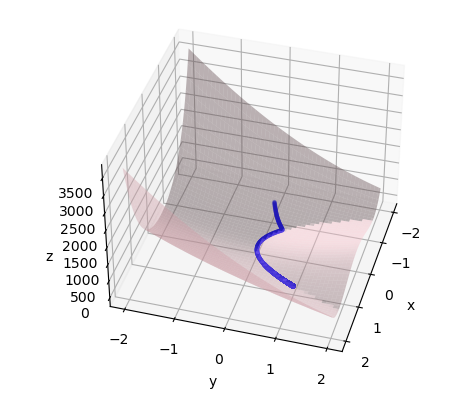

In [ ]:
x1=np.array(points_to_plot2)[:,0].flatten()
y1=np.array(points_to_plot2)[:,1].flatten()
z1=function_to_plot(x1, y1)

Візуалізація МНС з лямбда оптимальною


In [ ]:
x2 = np.linspace(-2, 2, 100)
y2 = np.linspace(-2, 2, 100)

X, Y = np.meshgrid(x2, y2)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, z, color='pink', alpha=0.4)
ax.scatter(x1, y1, z1, c='blue', s=5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

<IPython.core.display.Javascript object>

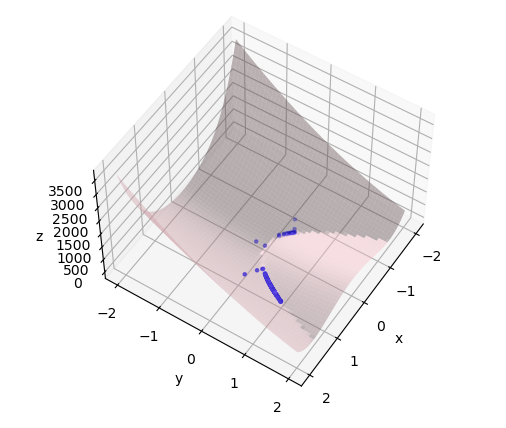

# Висновки
Зображена на графіку 1 функція Розенброка задається рівнянням    $~~z = (1-x)^{2} + 100(y-x^2)^2$. Її глобальний мінімум - точка (1, 1), в якій вона набуває значення 0.
За результатами видно, що для МНС з константним кроком необхідно, в середньому у 25 разів більше обрахунків значення функції, що при більших масштабах значно вплинуло б на ефективність, що очевидно. 

Цікавішим є вплив вибору різницевих схем. В обох випадках краще себе показала центральна, це також очікуваний результат:




```
182
Градієнт [ 0.00523278 -0.00616537]
Гессіан [[ 798.76848239 -398.78831437]
 [-398.78831437  200.        ]]
Норма градієнту 0.00808663745414058
Напрямок [ 0.00523278 -0.00616537]
Лямбда оптимальне 0.0011845485363553949
Нова точка [[0.99646459]
 [0.9929305 ]]
Значення функції у новій точці 1.2511619877116804e-05
```





```
5105
Градієнт [-0.05943875  0.02524052]
Норма градієнту 0.06457591086986517
Напрямок [-0.92044766  0.39086584]
Значення функції у новій точці 2.0700901981339077e-05
Лямбда 7.8125e-05
Нова точка [[0.99547504]
 [0.99092305]]
```



Більш цікавим явищем є різниця між роботою і точністю лівої та правої схем:


Ліва схема для МНС з оптимальним кроком

```
396
Градієнт [-0.0121593  0.0052963]
Гессіан [[ 854.80915337 -412.59882469]
 [-412.59882469  200.        ]]
Норма градієнту 0.013262705449563381
Напрямок [-0.0121593  0.0052963]
Лямбда оптимальне 0.0009501159992405705
Нова точка [[1.03100861]
 [1.06302639]]
Значення функції у новій точці 0.0009617610094209389
-------
```




Права схема для МНС з оптимальним кроком
```
196
Градієнт [-0.00237003  0.00041295]
Гессіан [[ 758.02537093 -388.44613842]
 [-388.44613842  200.        ]]
Норма градієнту 0.0024057366768962195
Напрямок [-0.00237003  0.00041295]
Лямбда оптимальне 0.0011455279469300798
Нова точка [[0.97061806]
 [0.94204574]]
Значення функції у новій точці 0.0008635864791544343

```



Права схема для МНС з константним кроком
```
4693
Градієнт [-0.08117073  0.03890111]
Норма градієнту 0.09001102021801968
Напрямок [-0.90178656  0.43218168]
Значення функції у новій точці 0.0009819764306843147
Лямбда 7.8125e-05
Нова точка [[0.96866455]
 [0.93828528]]
```

Ліва схема для МНС з константним кроком
```
6100
Градієнт [-0.10206393  0.04610971]
Норма градієнту 0.11199621474321411
Напрямок [-0.91131591  0.4117078 ]
Значення функції у новій точці 0.0007784740992886385
Лямбда 7.8125e-05
Нова точка [[1.02788249]
 [1.05664444]]
```


